In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
import math
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

first, importing data from UCI Machine Learning
If you don't know how to download data from UCI , check this https://youtu.be/Q2pVjX2Umqk

In [232]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data",
                  names=["mcv","alkphos","sgpt","sgot","gammagt","drinks","selector"])

Each line in the dataset constitutes the record of a single male individual.

In [233]:
#from pathlib import Path   
#df.to_csv(r'C:\Users\Asus\Desktop\dff.csv', index=False)

It's been mentioned in the data description there are no missing values in bupa.

In [234]:
# Get some info on the dataset 

In [235]:
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [236]:
print( df.info(), df.skew()) #also checking if data is skewed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcv       345 non-null    int64  
 1   alkphos   345 non-null    int64  
 2   sgpt      345 non-null    int64  
 3   sgot      345 non-null    int64  
 4   gammagt   345 non-null    int64  
 5   drinks    345 non-null    float64
 6   selector  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB
None mcv        -0.388433
alkphos     0.753667
sgpt        3.063499
sgot        2.293072
gammagt     2.866094
drinks      1.543819
selector   -0.324383
dtype: float64


<AxesSubplot:xlabel='drinks', ylabel='count'>

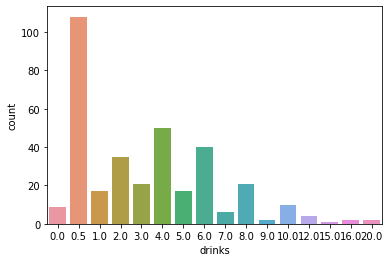

In [59]:
# pair plot
sns.pairplot(data = df, vars=['mcv','alkphos','sgpt','sgot','gammagt','drinks'])
plt.show()

Looks like there may be some linear correlations between some of the features i.e sgot&sgpt.
It seems to gammagt and sgot or gammagt and sgpt are (barely) have linear correlation! 

Seaborn correlation heatmap is helpful to detect linear and nonlinear relationships and find potential relationships between variables and it's useful to understand the strength of these relationships.

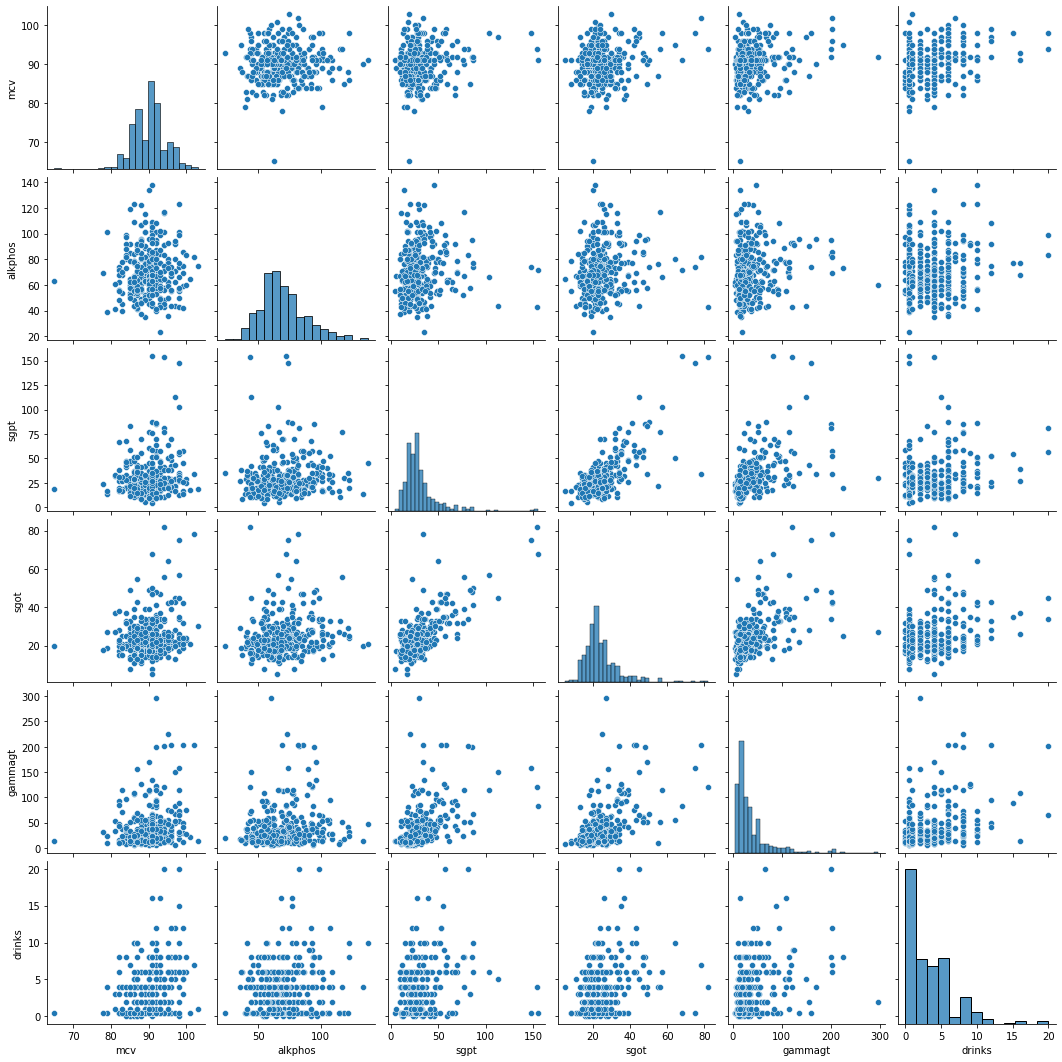

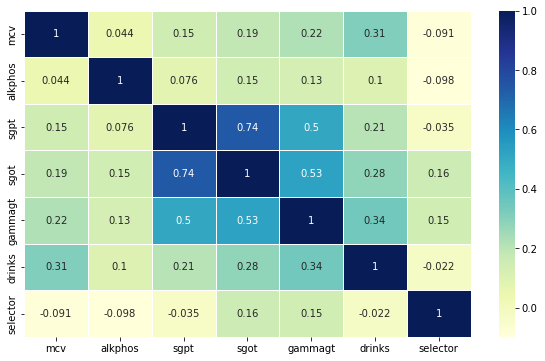

In [238]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=0.7)

sgot&sgpt are strongly and  gammagt&sgot , gammagt&sgpt ( between 0.5 and 0.7 ) are moderately correlated. 
Correlation coefficients whose magnitude are between 0.3 and 0.5 ()indicate variables which have a low correlation.
[0-0.19 => very weak , 0.2-0.30 = weak]

<AxesSubplot:xlabel='drinks', ylabel='count'>

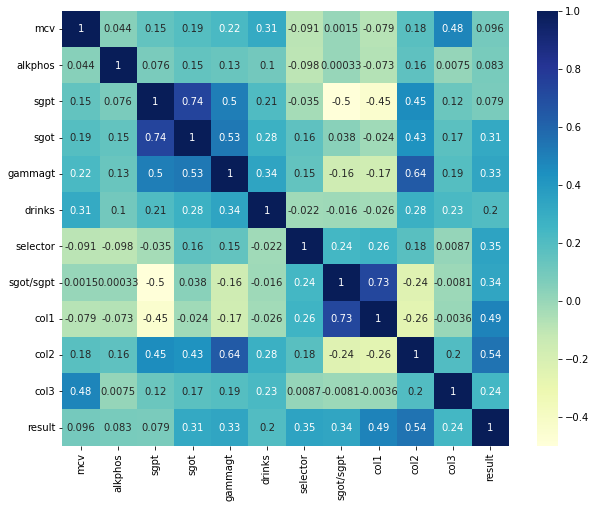

In [239]:
#sns.countplot(drinks) 
sns.countplot(x='drinks',data=df) 

# GroupBy

GroupBy allows us to group our data based on different features and get a more accurate ideas about data. 

Here i'm trying to predict "drinks"(target variable) based on other features are all liver function tests (also known as a liver panel). They are blood tests that measure different enzymes and check the overall health of liver.

It might be useful to analyze other variables separately by drinks. #DataFrame.groupby()

In [240]:
#drinks_vs_mcv
mcv_drinks=df[['mcv', 'drinks']]
(mcv_drinks.groupby(["drinks"])).describe()

mcv                                                      
        count       mean       std   min    25%   50%    75%    max
drinks                                                             
0.0       9.0  87.888889  4.314060  84.0  85.00  87.0  88.00   98.0
0.5     108.0  88.851852  4.609650  65.0  86.00  89.0  91.25  101.0
1.0      17.0  90.000000  4.962358  81.0  87.00  90.0  92.00  103.0
2.0      35.0  90.028571  3.240241  84.0  87.50  90.0  92.00   98.0
3.0      21.0  88.809524  4.142693  81.0  86.00  89.0  91.00   99.0
4.0      50.0  89.260000  3.724217  79.0  87.00  89.5  91.00   98.0
5.0      17.0  92.176471  4.171860  86.0  90.00  92.0  94.00   99.0
6.0      40.0  92.675000  3.771604  82.0  90.75  92.0  95.00  100.0
7.0       6.0  92.500000  5.468089  85.0  91.25  92.0  92.75  102.0
8.0      21.0  92.238095  4.504495  82.0  90.00  92.0  96.00  100.0
9.0       2.0  90.000000  2.828427  88.0  89.00  90.0  91.00   92.0
10.0     10.0  90.500000  4.034573  86.0  87.00  91.0  92.00   98.0
12.0      4.0  96.000000  2.943920  92.0  95.00  96.5  97.50   99.0
15.0      1.0  98.000000       NaN  98.0  98.00  98.0  98.00   98.0
16.0      2.0  92.000000  1.414214  91.0  91.50  92.0  92.50   93.0
20.0      2.0  96.000000  2.828427  94.0  95.00  96.0  97.00   98.0

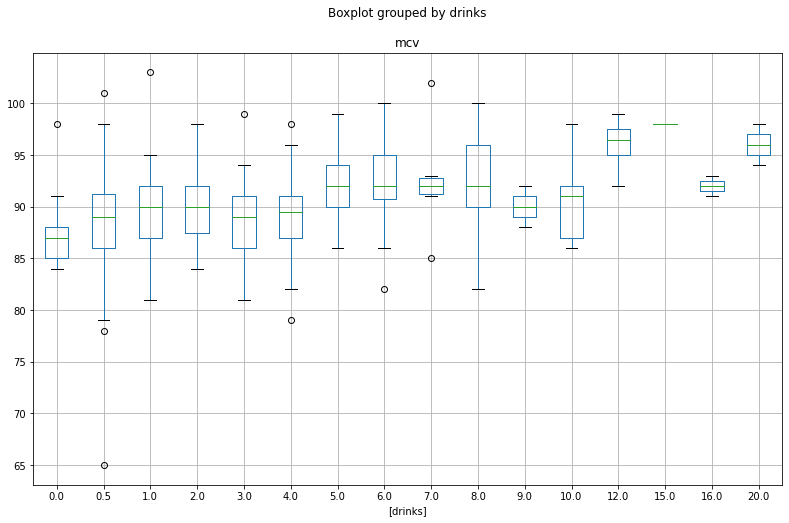

In [241]:
mcv_drinks.boxplot(by=['drinks'],figsize=(13, 8))    
plt.show()

In [242]:
# drinks_vs_alkphos

alkphos_drinks=df[['alkphos', 'drinks']]
(alkphos_drinks.groupby(["drinks"])).describe()

alkphos                                                       
         count       mean        std   min    25%   50%    75%    max
drinks                                                               
0.0        9.0  71.222222  15.817536  54.0  56.00  70.0  78.00   97.0
0.5      108.0  70.722222  18.458255  23.0  58.00  67.0  79.25  122.0
1.0       17.0  66.529412  11.848616  41.0  60.00  65.0  75.00   92.0
2.0       35.0  68.885714  16.280214  44.0  58.00  66.0  79.00  109.0
3.0       21.0  65.142857  10.822595  47.0  59.00  65.0  71.00   89.0
4.0       50.0  69.140000  21.574749  35.0  54.25  67.0  80.00  134.0
5.0       17.0  61.470588  15.112568  42.0  52.00  59.0  70.00  102.0
6.0       40.0  68.475000  17.625721  36.0  56.75  64.5  80.00  109.0
7.0        6.0  72.333333  19.459359  46.0  57.25  80.5  83.50   93.0
8.0       21.0  71.000000  19.219781  44.0  57.00  69.0  80.00  123.0
9.0        2.0  92.000000   1.414214  91.0  91.50  92.0  92.50   93.0
10.0      10.0  81.800000  30.239048  41.0  59.25  78.5  91.50  138.0
12.0       4.0  86.000000  17.606817  69.0  73.50  83.5  96.00  108.0
15.0       1.0  77.000000        NaN  77.0  77.00  77.0  77.00   77.0
16.0       2.0  72.500000   6.363961  68.0  70.25  72.5  74.75   77.0
20.0       2.0  91.000000  11.313708  83.0  87.00  91.0  95.00   99.0

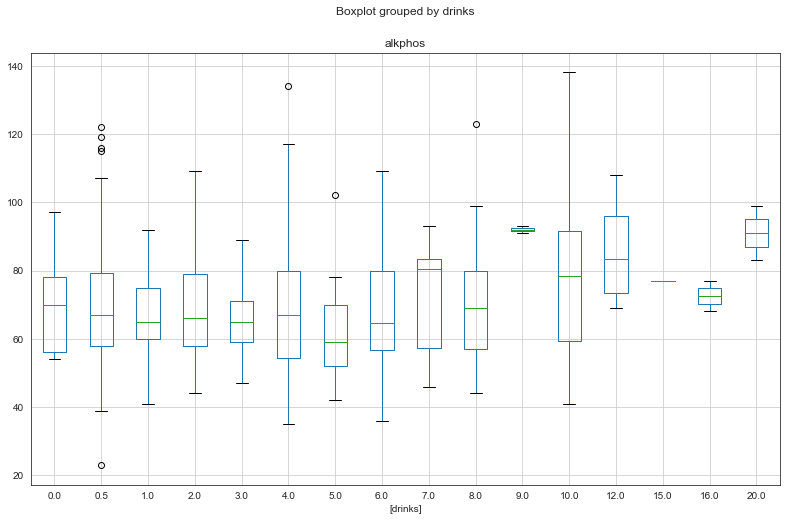

In [243]:
alkphos_drinks.boxplot(by=['drinks'],figsize=(13, 8))    
plt.show()

In [244]:
# sgot_vs_drinks

sgot_drinks=df[['sgot', 'drinks']]
(sgot_drinks.groupby(["drinks"])).describe()

sgot                                                      
        count       mean        std   min    25%   50%    75%   max
drinks                                                             
0.0       9.0  22.555556   5.525195  16.0  18.00  21.0  27.00  32.0
0.5     108.0  22.629630   9.242924   8.0  17.75  21.0  26.00  75.0
1.0      17.0  21.882353   4.662113  14.0  19.00  22.0  24.00  30.0
2.0      35.0  22.371429   4.959161  14.0  18.50  22.0  25.50  33.0
3.0      21.0  23.333333   8.457738  12.0  18.00  20.0  26.00  49.0
4.0      50.0  25.440000  13.015156   5.0  19.00  22.0  27.00  82.0
5.0      17.0  23.294118   8.751891  11.0  18.00  21.0  26.00  45.0
6.0      40.0  26.600000   9.515978  14.0  20.75  25.5  28.25  57.0
7.0       6.0  39.000000  21.522082  18.0  26.00  33.5  44.00  78.0
8.0      21.0  25.952381   8.680301  17.0  21.00  23.0  25.00  48.0
9.0       2.0  31.500000   4.949747  28.0  29.75  31.5  33.25  35.0
10.0     10.0  33.100000  13.486207  21.0  23.25  29.5  39.25  64.0
12.0      4.0  32.000000   8.205689  24.0  27.00  30.5  35.50  43.0
15.0      1.0  35.000000        NaN  35.0  35.00  35.0  35.00  35.0
16.0      2.0  31.500000   7.778175  26.0  28.75  31.5  34.25  37.0
20.0      2.0  39.500000   7.778175  34.0  36.75  39.5  42.25  45.0

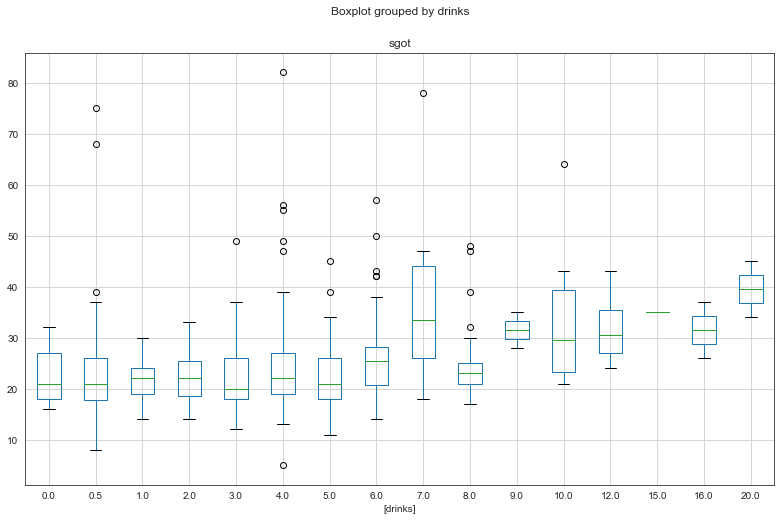

In [245]:
sgot_drinks.boxplot(by=['drinks'],figsize=(13, 8))    
plt.show()

In [246]:
# gammagt_vs_drinks

gammagt_drinks=df[['gammagt', 'drinks']]

(gammagt_drinks.groupby(["drinks"])).describe()

gammagt                                                            
         count        mean        std    min     25%    50%     75%    max
drinks                                                                    
0.0        9.0   25.444444  14.266316   10.0   14.00   23.0   32.00   54.0
0.5      108.0   26.546296  24.326204    5.0   13.00   18.0   31.50  159.0
1.0       17.0   29.823529  28.966004    8.0   14.00   19.0   34.00  115.0
2.0       35.0   40.457143  51.854062    9.0   18.00   26.0   36.50  297.0
3.0       21.0   33.476190  26.807870    6.0   16.00   26.0   36.00  104.0
4.0       50.0   33.440000  30.570200    7.0   16.00   22.5   41.25  169.0
5.0       17.0   46.058824  44.836468   11.0   15.00   24.0   49.00  150.0
6.0       40.0   44.700000  36.503038   14.0   19.75   34.5   57.25  203.0
7.0        6.0   87.000000  67.545540   14.0   44.75   73.0  111.00  203.0
8.0       21.0   57.714286  57.204146    6.0   25.00   44.0   60.00  225.0
9.0        2.0  124.500000   2.121320  123.0  123.75  124.5  125.25  126.0
10.0      10.0   39.600000  18.337575   11.0   27.25   37.0   53.25   73.0
12.0       4.0   96.750000  74.576024   41.0   47.00   71.5  121.25  203.0
15.0       1.0   89.000000        NaN   89.0   89.00   89.0   89.00   89.0
16.0       2.0   61.000000  66.468037   14.0   37.50   61.0   84.50  108.0
20.0       2.0  133.000000  96.166522   65.0   99.00  133.0  167.00  201.0

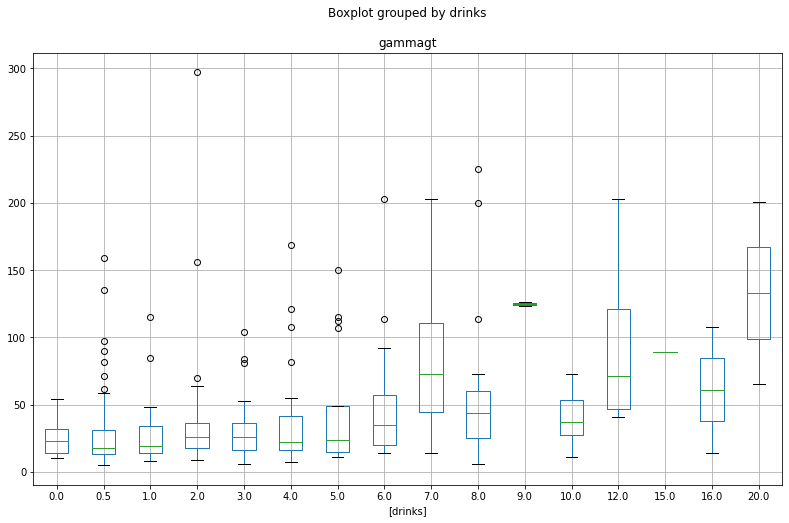

In [247]:
gammagt_drinks.boxplot(by=['drinks'],figsize=(13, 8))    
plt.show()

In each boxplot outliers can be seen ,I think mabye age,weiht,race or having other diseases are reason for the existence of outliers and because these characteristics are not mentioned in the data and its description, in my opinion
there is no good reason to remove outliers #true outliers. 

Consider a situation analyzer wants to remove an outlier based on i.e "gammagt_drinks.boxplot(by=['drinks'])". the variable has been removed in a row related to someone's blood test, it's possible the other variables in the same row may not be an outlier based on their boxplot (grouped by drinks). Removing a part of a blood test like the way mentioned befor, causes mistakes in prediction. 

# creating binary columns

ALT(sgpt) vs. AST(SGOT) tests

Healthcare professionals may use both ALT and AST tests to check for the presence of liver enzymes in the blood, as this can give them a clearer idea of overall liver function and health.

In [248]:
df['sgot/sgpt']=df['sgot'] / df['sgpt'] #An SGOT/SGPT ratio greater than 1 is highly suggestive of alcoholic hepatitis .

l=list(df['sgot/sgpt'])

s=[]

for i in l:
    if i>=1: #possibility of liver disorder ; alcoholic hepatits
        s.append(1)
    else  :
        s.append(0) #not alcoholic hepatits        


col1= pd.DataFrame(s, columns =['col1']) 


df['col1']=col1.values


<AxesSubplot:xlabel='col1', ylabel='count'>

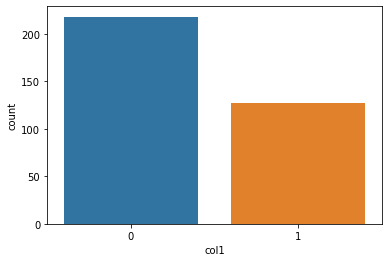

In [249]:
sns.countplot(x='col1',data=df)

GGT(gammagt) vs ALP(alkphos)

A GGT test can't diagnose the specific cause of liver disease. So it is usually done along with or after other liver function tests, most often an alkaline phosphatase (ALP) test. ALP is another type of liver enzyme. It's often used to help diagnose bone disorders as well as liver disease.


High levels of ALP(alkphos) and high levels of GGT means your symptoms are likely due to liver disorder
and not a bone disorder. 

High levels of ALP(alkphos) and low or normal GGT means it's more likely you have a bone disorder.

In [250]:

ll2=list(df['alkphos'])
ll=list(df['gammagt'])


w=[]
ww=[] 

for i in ll:
    if i>=30:   #GGT levels in the range of 0 to 30 IU/L are normal 
        w.append(1)
    else  :
        w.append(0)  
            
for i in ll2:
    if i>=130:  #AlP Values above 130 U/L are usually considered to be high.
        ww.append(1)
    else  :
        ww.append(0) 


col2= pd.DataFrame(w, columns =['col2']) 

col3=pd.DataFrame(ww, columns =['col3'])

df['col2']=col2.values
df['col3']=col3.values

In [251]:
#MCV
#MCV values greater than 100 fl in patients with liver disease almost invariably indicate alcohol-related disease. 

ll4=list(df['mcv'])

r=[]

for i in ll4:
    if i>=100 :  
        r.append(1) #patients with liver disease
    else  :
        r.append(0) #patients without liver disease


col4= pd.DataFrame(r, columns =['col4']) 
df['col4']=col4.values

In [252]:
#result

r1 = list(df['col1']) #An SGOT/SGPT ratio
r2 = list(df['col2']) #gammagt
r3 = list(df['col3']) #alkphos
r4 = list(df['col4']) #mcv

result= [] 


for i in range(len(r1)):
    
    
    if max(r1[i],r2[i]) == 1  and  max(r3[i],r4[i])<=1 :
        
         result.append(1)  #Probability of liver disorder 
    else:
        
         result.append(0)  #Low probability (almost zero) of liver disorder 



res= pd.DataFrame(result, columns =['result']) 
df['result']=res.values

All the ranges and conditions depend on the references and expert opinion.

# Visualization , binary coloumns and drinks

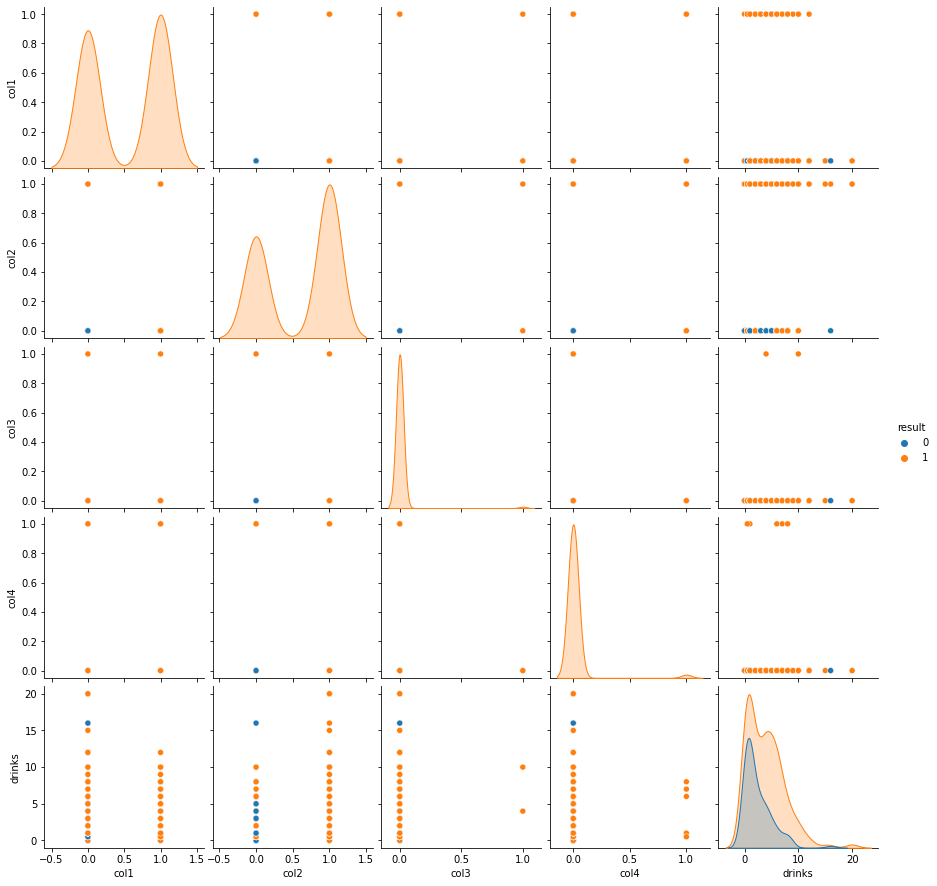

In [253]:
sns.pairplot( df[['col1','col2','col3','col4','result','drinks',]] ,hue="result")
plt.show()

<AxesSubplot:xlabel='drinks', ylabel='count'>

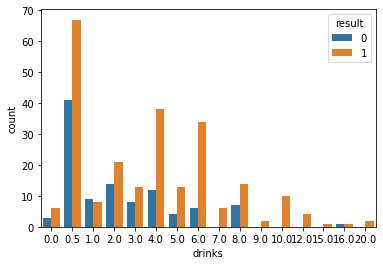

In [254]:
sns.countplot(x='drinks',data=df,hue='result')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


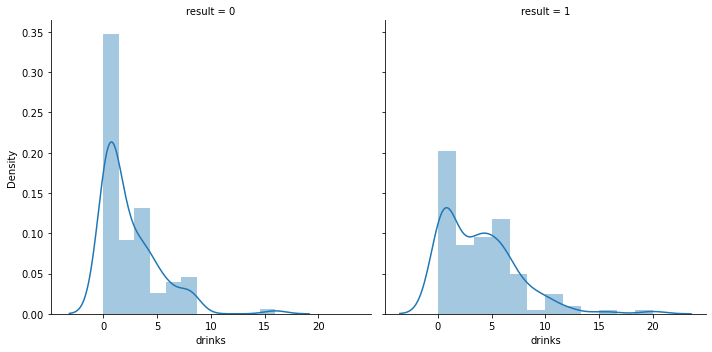

In [64]:
g = sns.FacetGrid(df, col='result', size=5)
g = g.map(sns.distplot, "drinks")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


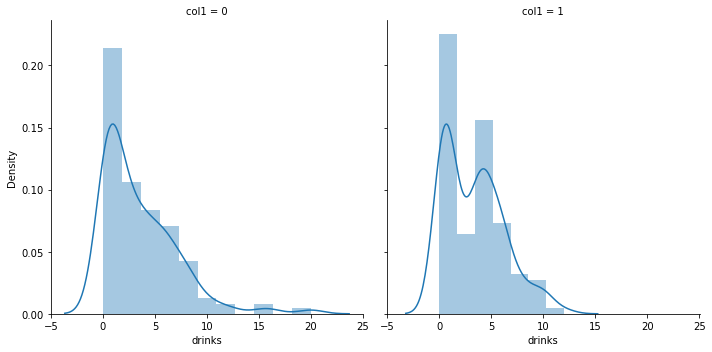

In [106]:
 #col1=SGOT/SGPT ratio
(sns.FacetGrid(df, col='col1', size=5)).map(sns.distplot, "drinks")

In [88]:
# sorted_df=df.sort_values("selector")
# sorted_df

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector,sgot/sgpt,col1,col2,col3,col4,result
0,85,92,45,27,31,0.0,1,0.600000,0,1,0,0,1
175,97,71,29,22,52,8.0,1,0.758621,0,1,0,0,1
181,92,93,22,28,123,9.0,1,1.272727,1,1,0,0,1
182,92,77,86,41,31,10.0,1,0.476744,0,1,0,0,1
188,93,77,39,37,108,16.0,1,0.948718,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,90,45,33,34,27,0.5,2,1.030303,1,0,0,0,1
59,90,63,24,24,24,0.5,2,1.000000,1,0,0,0,1
58,96,67,26,26,36,0.5,2,1.000000,1,1,0,0,1
56,84,82,21,21,19,0.5,2,1.000000,1,0,0,0,1


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


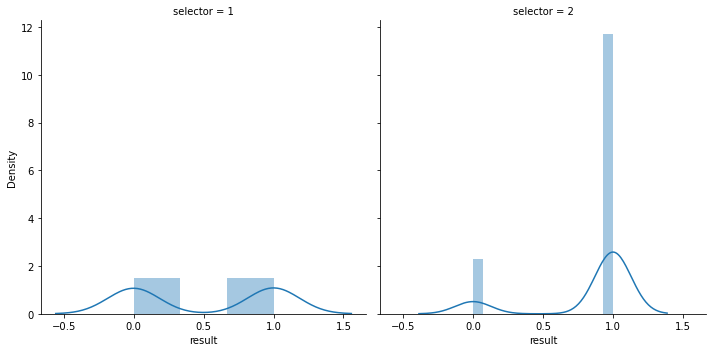

In [105]:
(sns.FacetGrid(df, col='selector', size=5)).map(sns.distplot, "result")
plt.show()
sns.countplot(x='selector',data=df) 

Larger test datasets ensure a more accurate calculation of model performance. also ""df.loc[df['selector'] ==1]"" is balanced.

In [256]:
#selector1=train
train=df.loc[df['selector'] ==1]

#selector2=test
test=df.loc[df['selector']==2]

print ('test shape ',test.shape,'train shape', train.shape)

test shape  (200, 13) train shape (145, 13)


# scaling_df

Creating #scaling_df dataframe with # MinMaxScaler to scale mcv,alkphos,sgpt,sgot,gammagt,drinks,sgot/sgpt.
The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.

In [257]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[['mcv','alkphos','sgpt','sgot','gammagt','drinks','sgot/sgpt']])
scaled_df= pd.DataFrame(scaled_df, columns =['mcv','alkphos','sgpt','sgot','gammagt','drinks','sgot/sgpt'])
scaled_df=pd.concat([scaled_df, df[['col1','col2','col3','col4','result','selector']]], axis=1)
scaled_df

# target variable =drinks 

In [29]:
#unchanged dataframe
bupa = df.copy()
bupa = bupa.drop(bupa.iloc[:, 7:13], axis=1)
bupa

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


<AxesSubplot:xlabel='selector', ylabel='count'>

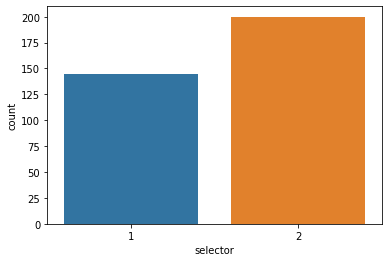

In [53]:
sns.countplot(x='selector',data=bupa) #train and test

In [30]:
#bupa
#selector1=train
bupa_train=bupa.loc[bupa['selector'] ==1]
x_train_bupa = bupa_train.iloc[:,0:5]
y_train_bupa = bupa_train[['drinks']]

#selector2=test
bupa_test=bupa.loc[df['selector']==2]
x_test_bupa = bupa_test.iloc[:,0:5]
y_test_bupa = bupa_test[['drinks']]




# df ; changed bupa include features with binary values 

#selector1=train
train =df.loc[df['selector'] ==1]
x_train_df =train[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','result']]
y_train_df =train[['drinks']]

#selector2=test
test=df.loc[df['selector']==2]
x_test_df =test[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','result']]
y_test_df =test[['drinks']]



#scaled_df 

#selector1=train
train_scaled_df   = scaled_df.loc[scaled_df['selector'] ==1]
x_train_scaled_df = train_scaled_df[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','result']]
y_train_scaled_df = train_scaled_df[['drinks']]

#selector2=test
test_scaled_df   = scaled_df.loc[scaled_df['selector']==2 ]
x_test_scaled_df = test_scaled_df[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','result']]
y_test_scaled_df = test_scaled_df[['drinks']]

# linear regression

In [260]:
#bupa
reg_bupa=LinearRegression().fit(x_train_bupa, y_train_bupa)
y_pred_bupa = reg_bupa.predict(x_test_bupa)

#df
reg_df=LinearRegression().fit(x_train_df, y_train_df)
y_pred_df= reg_df.predict(x_test_df)

#scaled_df
reg_scaled_df=LinearRegression().fit(x_train_scaled_df, y_train_scaled_df)
y_pred_scaled_df= reg_scaled_df.predict(x_test_scaled_df)

In [261]:
MSE_bupa = metrics.mean_squared_error(y_test_bupa,y_pred_bupa)  
RMSE_bupa = math.sqrt(MSE_bupa)

print (' MSE_bupa :','\n',MSE_bupa,'\n',' RMSE_bupa:','\n',RMSE_bupa,'\n');


MSE_df = metrics.mean_squared_error(y_test_df,y_pred_df)  
RMSE_df = math.sqrt(MSE_df)

print ('MSE_df :','\n',MSE_df,'\n','RMSE_df:','\n', RMSE_df,'\n');


MSE_scaled_df = metrics.mean_squared_error(y_test_scaled_df,y_pred_scaled_df)  
RMSE_scaled_df = math.sqrt(MSE_scaled_df)

print ('MSE_scaled_df :','\n',MSE_scaled_df,'\n','RMSE_scaled_df:','\n', RMSE_scaled_df);

 MSE_bupa : 
 11.80878407169715 
  RMSE_bupa: 
 3.4363911406731846 

MSE_df : 
 11.951896664546712 
 RMSE_df: 
 3.457151524672691 

MSE_scaled_df : 
 0.029879741661366754 
 RMSE_scaled_df: 
 0.17285757623363449


In [262]:

r2_score_bupa=r2_score(y_test_bupa,y_pred_bupa)

r2_score_df=r2_score(y_test_df,y_pred_df)

r2_score_scaled_df=r2_score(y_test_scaled_df,y_pred_scaled_df)

print ('r2_score_bupa:','\n','\n',r2_score_bupa,'\n','\n', 'r2_score_df:','\n','\n',
       r2_score_df,'\n','\n','r2_score_scaled_df:','\n','\n',r2_score_scaled_df)

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
# R2 is negative only when the chosen model does not follow the trend of the data.
# It seems model may be giving better performance because of over-fitting. 
# It can happen because of various reasons like small dataset and noise in the dataset.

r2_score_bupa: 
 
 -0.46972422834375593 
 
 r2_score_df: 
 
 -0.4875360575562335 
 
 r2_score_scaled_df: 
 
 -0.4875360575562324


Im not sure negative r2_score for all three datasets is because of over fitting or small datasets so im gonna try to 
find out what's the reason and can it be fixed or not!

# Regularization Regression

To prevent over-fitting which may result from simple linear regression Ridge regression (and Lasso regression) is good technique.

Lasso regression will automatically select those features are useful, discarding the useless or redundant features and make their coefficient equal to 0 . (feature selection) 

Ridge regression is reducing the size of the coefficients instead of setting them equal to zero.

In [263]:
# ridge regression lost function
# Using all features

In [264]:
# bupa_ridge

In [265]:
bupa_model=Ridge()

cv_bupa = RepeatedKFold (n_splits=5, n_repeats=5, random_state=1)

grid_bupa = dict()

grid_bupa['alpha'] = np.logspace(-8, 8, 100) # It will check from 1e-08 to 1e+08

search_bupa = GridSearchCV(bupa_model, grid_bupa, scoring='neg_mean_absolute_error', cv=cv_bupa)

results_bupa = search_bupa.fit(x_train_bupa, y_train_bupa)

print('MAE: ', results_bupa.best_score_)
print('Config: %s' % results_bupa.best_params_)

MAE:  -2.5213356001818408
Config: {'alpha': 151.99110829529394}


In [266]:
bupa_ridge = Ridge(alpha=151.99110829529394,normalize=True).fit(x_train_bupa, y_train_bupa)
bupa_ridge_pred = bupa_ridge.predict(x_test_bupa)

MSE_bupa = metrics.mean_squared_error(y_test_bupa,bupa_ridge_pred)  
MSE_bupa

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


7.991800506372017

In [267]:
r_score_bupa=r2_score(y_test_bupa,bupa_ridge_pred)
r_score_bupa

0.005338503863695387

by 'normalize=true' in ridge, i got positive r2 score but 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
To scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

In [270]:
#alphas=[0.1, 1.0, 10.0]

pipe_bupa = make_pipeline(StandardScaler(), linear_model.RidgeCV(alphas =np.logspace(-6, 6, 13))).fit(x_train_bupa,y_train_bupa)

                          
pipe_pred_bupa=pipe_bupa.predict(x_test_bupa)                          

MSE_pipe_bupa = metrics.mean_squared_error(y_test_bupa,pipe_pred_bupa)  

MSE_pipe_bupa

9.52996011306514

In [271]:
r2_score_pipe_bupa=r2_score(y_test_bupa,pipe_pred_bupa)
r2_score_pipe_bupa

-0.18610122670389773

In [272]:
#scaled_df_ridge

For scaled_df the normalize parameter left to its default value (the default behavior of this estimator is to not do any normalization.). Minmaxscaler has been used instead.

In [273]:
scaled_df_model=Ridge()
scaled_df_cv = RepeatedKFold(n_splits=10, n_repeats=5)

scaled_df_grid = dict()

scaled_df_grid['alpha'] = np.logspace(-8, 8, 100) # It will check from 1e-08 to 1e+08

scaled_df_search = GridSearchCV(scaled_df_model, scaled_df_grid, scoring='neg_mean_absolute_error', cv=scaled_df_cv)

scaled_df_results = scaled_df_search.fit(x_train_scaled_df, y_train_scaled_df)
# summarize
print('MAE: %.3f' % scaled_df_results.best_score_)
print('Config: %s' % scaled_df_results.best_params_)

MAE: -0.126
Config: {'alpha': 0.572236765935022}


In [274]:
scaled_df_ridge = Ridge(alpha= 0.572236765935022).fit(x_train_scaled_df, y_train_scaled_df)
scaled_df_ridge_pred = scaled_df_ridge.predict(x_test_scaled_df)
MSE_scaled_df = metrics.mean_squared_error(y_test_scaled_df,scaled_df_ridge_pred)  
MSE_scaled_df

0.026256038164041248

In [275]:
r_score_scaled_df=r2_score(y_test_scaled_df,scaled_df_ridge_pred)
r_score_scaled_df

-0.30713323897584743

In [276]:
#df_ridge

In [277]:
df_model=Ridge()

df_cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

df_grid = dict()

df_grid['alpha'] = np.logspace(-8, 8, 100)

df_search = GridSearchCV(df_model, df_grid, scoring='neg_mean_absolute_error', cv=df_cv)

df_results = df_search.fit(x_train_df, y_train_df)
# summarize
print('MAE: %.3f' % df_results.best_score_)
print('Config: %s' % df_results.best_params_)

MAE: -2.530
Config: {'alpha': 220.513073990305}


In [278]:
df_ridge = Ridge(alpha= 220.513073990305,normalize=True).fit(x_train_df, y_train_df)

df_ridge_pred = df_ridge.predict(x_test_df)

MSE_df = metrics.mean_squared_error(y_test_df,df_ridge_pred)  

MSE_df

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


8.002713895739907

In [145]:
r2_score_df=r2_score(y_test_df,df_ridge_pred)
r2_score_df

0.003980220684838831

In [279]:
pipe_df = make_pipeline(StandardScaler(), linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))).fit(x_train_df, y_train_df)
pipe_pred_df=pipe_df.predict(x_test_df)                          

MSE_pipe_df = metrics.mean_squared_error(y_test_df,pipe_pred_df)  

MSE_pipe_df


9.613680062477055

In [280]:
r2_score(y_test_df,pipe_pred_df)

-0.19652103261273068

In [281]:
# param_grid = {'alpha':np.logspace(-4, 0, 30)} # Checking for alpha from .0001 to 1 and finding the best value for alpha} 

# modell=Ridge()

# ridge_cv = GridSearchCV(modell, param_grid, cv = 5).fit(x_train_df, y_train_df)

# print(ridge_cv.best_params_)

# print(ridge_cv.best_score_) # Returns the mean accuracy on the given test data and label


# RandomForestRegression

In [282]:
#df#tunning

In [292]:
param_gridcv = {'n_estimators': [5,10,20,50,100],'max_depth': range(3,7),
                      'min_samples_split':[2, 6, 10],'min_samples_leaf':[1, 3, 4]}

# n_estimators =  number of trees in the random forest
# max_depth =  maximum number of levels allowed in each decision tree
# min_samples_split = minimum sample number to split a node
# min_samples_leaf =  minimum sample number that can be stored in a leaf node


df_rfr_gridcv= GridSearchCV( estimator=RandomForestRegressor() , param_grid=param_gridcv,  cv=5, 
                             scoring='neg_mean_squared_error',n_jobs=-1)

df_rfr_gridcv.fit(x_train_df,np.ravel(y_train_df))

print ('Best Parameters: ', df_rfr_gridcv.best_params_, ' \n')

Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 20}  



In [297]:
# Using the best parameters
rfr_df =RandomForestRegressor(n_estimators =20 ,max_depth=6,
                                min_samples_leaf= 6, min_samples_split=6).fit(x_train_df,np.ravel(y_train_df))

y_pred_df_rfr = rfr_df.predict(x_test_df)

MSE_df_rfr = np.square(np.subtract(np.array(y_test_df),y_pred_df_rfr)).mean()
print ('MSE_df_rfr:', MSE_df_rfr,'\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(np.array(y_test_df),y_pred_df_rfr))

MSE_df_rfr: 13.320308206676104 

Mean Absolute Error: 2.4931765246162514


In [294]:
#scaled_df#tunning

In [295]:
param_gridcv = {'n_estimators': [5,10,20,50,100],'max_depth': range(3,7),
                  'min_samples_split':[2, 6, 10],'min_samples_leaf':[1, 3, 4]}

rfr_gridcv= GridSearchCV( estimator=RandomForestRegressor() , param_grid=param_gridcv,cv=5,
                         scoring='neg_mean_squared_error',  n_jobs=-1)

rfr_gridcv.fit(x_train_scaled_df, np.ravel(y_train_scaled_df))

print ('Best Parameters: ', rfr_gridcv.best_params_, ' \n')

Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 5}  



In [298]:
# Using the best parameters
rfr_scaled_df =  RandomForestRegressor(n_estimators = 5 , max_depth=6, 
                                       min_samples_leaf= 4, min_samples_split=10).fit(x_train_scaled_df, np.ravel(y_train_scaled_df))

y_pred_scaled_df_rfr = rfr_df.predict(x_test_scaled_df)

MSE_scaled_df_rfr = np.square(np.subtract(np.array(y_test_scaled_df),y_pred_scaled_df_rfr)).mean()

 
print ('MSE_df_rfr:', MSE_df_rfr)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.array(y_test_scaled_df),y_pred_scaled_df_rfr))

MSE_df_rfr: 13.320308206676104
Mean Absolute Error: 1.4019566073395295


# Classification ; traget variable is 'result'

using #df and #scaled_df .

In [299]:
#knn

In [300]:
#scaled_df

In [301]:
#setting result as target

#train
train_scaled_df   = scaled_df.loc[scaled_df['selector'] ==1]

x_classify_train_scaled_df = train_scaled_df[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','drinks']]
y_classify_train_scaled_df = train_scaled_df[['result']]

#test
test_scaled_df   = scaled_df.loc[scaled_df['selector']==2 ]

x_classify_test_scaled_df = test_scaled_df[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','drinks']]
y_classify_test_scaled_df = test_scaled_df[['result']]

In [302]:
knn_scaled_df = KNeighborsClassifier()
knn_cv_scaled_df = GridSearchCV(knn_scaled_df, param_grid={'n_neighbors':np.arange(1,50)} ,
                                cv = 5).fit(x_classify_train_scaled_df ,np.ravel(y_classify_train_scaled_df))


print(knn_cv_scaled_df.best_params_)
print(knn_cv_scaled_df.best_score_)

{'n_neighbors': 1}
1.0


In [303]:
knn_scaled_df = KNeighborsClassifier(n_neighbors=1).fit(x_classify_train_scaled_df 
                                                        ,np.ravel(y_classify_train_scaled_df))
y_scaled_df_prediction = knn_scaled_df.predict(x_classify_test_scaled_df)

In [304]:
print(confusion_matrix(np.ravel(y_classify_test_scaled_df), y_scaled_df_prediction))
print(classification_report(np.ravel(y_classify_test_scaled_df), y_scaled_df_prediction))

[[ 33   0]
 [  0 167]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       167

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



It doesn't look good !!!! Let's check #df

In [305]:
#df

In [306]:
#train
train =df.loc[df['selector'] ==1]
x_classify_train_df =train[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','drinks']]
y_classify_train_df =train[['result']]

#test
test=df.loc[df['selector']==2]
x_classify_test_df =test[['mcv','alkphos','sgpt','sgot','gammagt','sgot/sgpt','col1','col2','col3','col4','drinks']]
y_classify_test_df =test[['result']]

In [307]:
knn_df = KNeighborsClassifier()
knn_cv_df = GridSearchCV(knn_df, param_grid={'n_neighbors':np.arange(1,50)} ,
                                cv = 5).fit(x_classify_train_df ,np.ravel(y_classify_train_df))


print(knn_cv_df.best_params_)
print(knn_cv_df.best_score_)

{'n_neighbors': 1}
0.8551724137931034


In [308]:
knn_df = KNeighborsClassifier(n_neighbors=1).fit(x_classify_train_df 
                                                        ,np.ravel(y_classify_train_df))
knn_df_prediction = knn_df.predict(x_classify_test_df)

In [309]:
print(confusion_matrix(np.ravel(y_classify_test_df), y_df_prediction))
print(classification_report(np.ravel(y_classify_test_df), knn_df_prediction))

[[ 24   9]
 [ 26 141]]
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        33
           1       0.94      0.84      0.89       167

    accuracy                           0.82       200
   macro avg       0.71      0.79      0.73       200
weighted avg       0.86      0.82      0.84       200



looks fine but I doubt it because in knn all features should be scaled. 

# randomforest 

In [310]:
#df

In [311]:
# Use the random grid to search for best hyperparameters

n_estimators =[5,20,50,100]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               
df_rfc_rndm = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = random_grid, cv = 5,
                                 n_jobs = -1).fit(x_classify_train_df,np.ravel(y_classify_train_df))

print ('Best Param: ', df_rfc_rndm.best_params_, ' \n')

Best Param:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30}  



In [312]:
rfc = RandomForestClassifier(n_estimators=50 ,min_samples_split= 10, 
                             min_samples_leaf=2, max_depth= 30).fit(x_classify_train_df,np.ravel(y_classify_train_df))
yy_pred = rfc.predict(x_classify_test_df)
print (accuracy_score(y_classify_test_df, yy_pred))                                                

1.0


In [313]:
print(classification_report(np.ravel(y_classify_test_df), yy_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       167

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Logistic Regression

In [314]:
# scaled_df

In [315]:
lr_scaleddf = LogisticRegression().fit(x_classify_train_scaled_df ,np.ravel(y_classify_train_scaled_df))

y_pred = lr_scaleddf.predict(x_classify_test_scaled_df)

print(confusion_matrix(y_classify_test_scaled_df, y_pred))

[[ 33   0]
 [  0 167]]
